Right now, we're getting really poor segmentation performance that might be the result of a poor dataset.

In [1]:
import os
import sys
sys.path.append('/home/taylor/PycharmProjects/uav-classif')

In [2]:
from utils.dataset.SegmentationDataset import SegmentationDataset
from utils.dataset.transforms import transforms as t

from torch.utils.data import DataLoader

In [3]:
train_data_path = "/home/taylor/PycharmProjects/uav-classif/kelp_species/train_input/data/train"
eval_data_path = "/home/taylor/PycharmProjects/uav-classif/kelp_species/train_input/data/eval"

ds_train = SegmentationDataset(eval_data_path, transform=t.train_transforms,
                               target_transform=t.train_target_transforms)
dl_train = DataLoader(ds_train, shuffle=True, batch_size=2, pin_memory=True,
                      drop_last=True, num_workers=os.cpu_count())

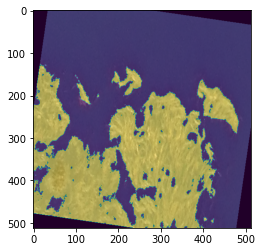

In [24]:
import matplotlib.pyplot as plt
import numpy as np

for xs, ys in dl_train:
    x = xs[0]
    y = ys[0]
    
    x = t.inv_normalize(x).detach().cpu().numpy()
    x = np.swapaxes(x, 0, 2)
    
    y = y.detach().cpu().numpy()
    y = y.T
    plt.imshow(x)
    plt.imshow(y * 128, alpha=0.5)
    plt.show()
    break

In [5]:
len(ds_train._labels)

2346

In [6]:
len(ds_train._images)

2346

In [7]:
ds_train._labels[0]

PosixPath('/home/taylor/PycharmProjects/uav-classif/kelp_species/train_input/data/eval/y/label_choked_2014_005_081.png')

In [8]:
ds_train._images[0]

PosixPath('/home/taylor/PycharmProjects/uav-classif/kelp_species/train_input/data/eval/x/choked_2014_005_081.png')